In [ ]:
! pip install qutip filter_functions
!pip install --upgrade scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 12.1 MB/s eta 0:00:00


In [ ]:
import filter_functions as ff
from filter_functions import analytic, plotting
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
from math import pi
import numpy as np

In [ ]:
# Pauli matrices
X, Y, Z = qt.sigmax(), qt.sigmay(), qt.sigmaz()

In [ ]:
#these are the phi and t_stamps we get from SAFE-GRAPE Optimization

phi = np.array([0.15040507, 0.22662143, 0.81338164, 1.60882984, 2.36321953, 2.9309562,
       3.28516708, 3.45474715, 3.45526928, 3.23345478, 2.61349612, 1.32113029,
       6.07523601, 5.57997002, 5.30330316, 5.16714173, 5.11696132, 5.10504146,
       5.09281771, 5.06053417, 5.01310673, 4.97551, 4.97366974, 5.01145251,
       5.06880815, 5.12563276, 5.18132239, 5.24721174, 5.32733826, 5.41424006,
       5.49967307, 5.58035189, 5.65086264, 5.69273024, 5.66329514, 5.47818519,
       2.18587196, 1.69954578, 1.63502883, 1.65029134, 1.58102867, 1.42275827,
       1.26989491, 1.22646316, 1.32296113, 1.52009356, 1.81069506, 2.16567911,
       -1.02393239, -1.19819281, -0.98608233, -0.86421354, -0.83115883, -0.82210699,
       -0.81340814, -0.80170519, -0.77641705, -0.72212651, -0.64007123, -0.57036507,
       -0.58814509, -0.75584938, -1.05454523, -1.35897787, -1.50255204, -1.36784821,
       -0.94512912, -0.38398199, 0.0629544, 0.23886577, 0.1616152, -0.04556237,
       -0.22770354, -0.25495998, -0.07294665, 0.2563205, 4.3174622, 3.75656933,
       3.39290744, 3.13520017, 2.94016075, 2.7974009, 2.70460944, 2.65801828,
       2.65447597, 2.69459055, 2.78042136, 2.90940093, 3.07128212, 3.252744,
       3.44621644, 3.65657649, 3.90264854, 4.21123338, 4.60144671, 5.06268089,
       -1.51979327, -0.32714796, 1.35224799, 2.96877042])

t_history = np.array([
    1.24462306e-09, 1.24860635e-09, 1.24536306e-09, 1.24000370e-09,
    1.24010816e-09, 1.24776900e-09, 1.26046912e-09, 1.27354216e-09,
    1.28205382e-09, 1.28220453e-09, 1.27306604e-09, 1.26350346e-09,
    1.40005554e-09, 1.39692284e-09, 1.39635931e-09, 1.39761874e-09,
    1.40002240e-09, 1.40275374e-09, 1.40566233e-09, 1.40915859e-09,
    1.41342158e-09, 1.41760949e-09, 1.41975079e-09, 1.41807213e-09,
    1.41299337e-09, 1.40739326e-09, 1.40449323e-09, 1.40546704e-09,
    1.40900757e-09, 1.41300542e-09, 1.41619064e-09, 1.41815891e-09,
    1.41865629e-09, 1.41736051e-09, 1.41421786e-09, 1.41023353e-09,
    1.60217733e-09, 1.64179084e-09, 1.66173643e-09, 1.66907469e-09,
    1.67495120e-09, 1.67290026e-09, 1.65567694e-09, 1.63160390e-09,
    1.61176080e-09, 1.59553431e-09, 1.58101988e-09, 1.57288918e-09,
    1.46987405e-09, 1.50028073e-09, 1.49871533e-09, 1.49087135e-09,
    1.48363993e-09, 1.47546980e-09, 1.46626969e-09, 1.46103343e-09,
    1.46342539e-09, 1.47148247e-09, 1.48039815e-09, 1.48727159e-09,
    1.49313602e-09, 1.50222128e-09, 1.51869863e-09, 1.53933393e-09,
    1.54993905e-09, 1.53949747e-09, 1.51794899e-09, 1.50585363e-09,
    1.50804167e-09, 1.51307862e-09, 1.51369933e-09, 1.51343242e-09,
    1.51736565e-09, 1.52494062e-09, 1.53001219e-09, 1.52193585e-09,
    1.29389970e-09, 1.30191641e-09, 1.30455682e-09, 1.30392924e-09,
    1.30273819e-09, 1.30222796e-09, 1.30226802e-09, 1.30212021e-09,
    1.30135639e-09, 1.30035961e-09, 1.29994920e-09, 1.30062258e-09,
    1.30233740e-09, 1.30479273e-09, 1.30756428e-09, 1.31015797e-09,
    1.31245075e-09, 1.31539167e-09, 1.32134776e-09, 1.33348913e-09,
    1.29965087e-09, 1.26135342e-09, 1.24133773e-09, 1.25059769e-09
])



##Normal Spin Echo vs GRAPE Spin Echo

In [ ]:
def generate_pulse_sequence(f, eps, tau, N, mode):
    """
    Generates a PulseSequence for Spin Echo (SE) or Arbitrary Echo (SE1).

    Parameters:
        epsilon (float): Sensitivity parameter.
        f (float): Frequency scaling factor.
        tau (float): Total sequence duration.
        N (int): Number of concatenations
        mode (str): "Ideal" for Spin Echo, "Grape" for Arbitrary Echo.

    Returns:
        PulseSequence: The generated sequence.
    """

    # Define constants
    epsilon_0 = 10  # Sensitivity normalization factor
    OMEGA = 0.2e9  # Default Omega
    tau_cycle = tau/N

    if mode == "FID":
        dt = [tau_cycle]
        H_c = [
            [X/2, [0]],
            [Z/2, [1]]
            ]
            # Noise Hamiltonian
        H_n = [
            [X/2, [1]],
            [Z/2, [1]]
            ]

        FID = ff.PulseSequence(H_c, H_n, dt)
        omega_list = ff.util.get_sample_frequencies(FID, n_samples=50000, spacing='log')
        FF = FID.get_filter_function(omega_list)

        return [FID, FF[1][1], omega_list*tau]

    if mode == "Ideal":
        # Pi pulse duration for simple square pulse
        tau_pi = 10e-9
        if (tau_cycle > tau_pi):

          # Control Hamiltonian
          J = (1 + eps)*np.array([0, np.pi / tau_pi, 0])
          dBz = [f * OMEGA] * 3

          H_c = [
              [X/2, J],
              [Z/2, dBz]
          ]

          # Noise Hamiltonian
          H_n = [
              [X/2, J / epsilon_0],
              [Z/2, [1] * 3]  # B-field
          ]

          # Time steps
          dt = [(tau_cycle - tau_pi) / 2, tau_pi, (tau_cycle - tau_pi) / 2]

          SE = ff.PulseSequence(H_c, H_n, dt)
          SE_n = ff.concatenate_periodic(SE, N)

          omega_list = ff.util.get_sample_frequencies(SE_n, n_samples=50000, spacing='log')
          FF = SE_n.get_filter_function(omega_list)

          return [SE_n, FF[1][1], omega_list*tau]

        else:
          raise ValueError("tau_cycle must be greater than tau_pi.")

    elif mode == "Grape":
        # Assume 't_history' and 'phi' are pre-defined externally
        global t_history, phi

        # Pi-pulse duration for GRAPE pulse
        tau_pi1 = np.sum(t_history)

        if (tau_cycle > tau_pi1):

          # Time steps
          dt1 = [(tau_cycle - tau_pi1) / 2]

          Cx = [0.]
          Cy = [0.]
          Nx = [0.]
          Ny = [0.]
          Nz = [1] * (len(phi) + 2)

          # Construct control pulses
          for t in t_history:
              dt1.append(t)
          dt1.append((tau_cycle - tau_pi1) / 2)

          for cx in OMEGA * (1 + eps) * np.cos(phi):
              Cx.append(cx)
              Nx.append(cx / epsilon_0)

          Cx.append(0)
          Nx.append(0)

          for cy in OMEGA * (1 + eps) * np.sin(phi):
              Cy.append(cy)
              Ny.append(cy / epsilon_0)

          Cy.append(0)
          Ny.append(0)

          Cz = f * OMEGA * np.ones(len(phi) + 2)

          # Define Control Hamiltonian
          H_c1 = [
              [X/2, Cx],
              [Y/2, Cy],
              [Z/2, Cz]
          ]

          # Define Noise Hamiltonian
          H_n1 = [
              [X/2, Nx],
              [Y/2, Ny],
              [Z/2, Nz]  # B-field
          ]

          SE1 = ff.PulseSequence(H_c1, H_n1, dt1)
          SE1_n = ff.concatenate_periodic(SE1, N)

          omega_list = ff.util.get_sample_frequencies(SE1_n, n_samples=50000, spacing='log')
          FF = SE1_n.get_filter_function(omega_list)

          return [SE1_n, FF[2][2], omega_list*tau]


        else:
          raise ValueError("tau_cycle must be greater than tau_pi1.")

    else:
        raise ValueError("Invalid mode. Choose 'SE' or 'SE1'.")




In [ ]:
def state_generator(time_stamp, pulse, psi_i, plot = "on"):
  Fid = []
  propagators = pulse.propagator_at_arb_t(time_stamp)
  points = plotting.get_states_from_prop(propagators, psi0=psi_i)
  for p in points:
    p0 = np.abs((p[0][0] + 1j*p[1][0])/(np.sqrt(2)))
    Fid.append(p0)
  if plot == "on":
    plt.plot(time_stamp, Fid)
    plt.show()
  return Fid

###Plot for comparing A1 and B1

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

# Ensure font is Arial and text is not converted to paths
mpl.rcParams.update({
    'font.size': 21,
    'font.family': 'Arial',
    'pdf.fonttype': 42  # Ensures fonts are stored as text, not outlines
})

/tmp/ipython-input-3825622088.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


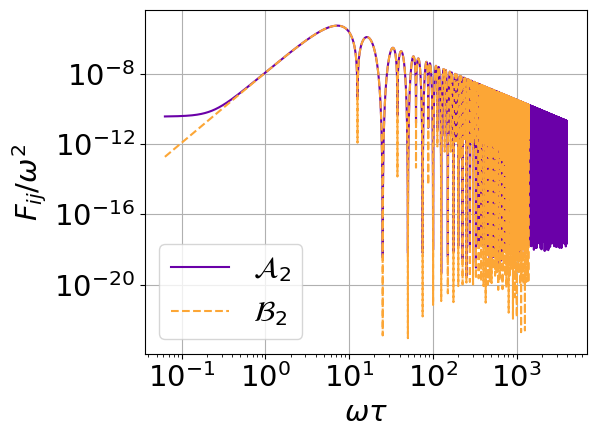

In [ ]:
A1 = generate_pulse_sequence(0, 0, 5e-3, 2, "Grape")
FF_A1 = A1[1]
omegatau_list1 = A1[2]

B1 = generate_pulse_sequence(0, 0, 5e-3, 2, "Ideal")
FF_B1 = B1[1]
omegatau_list2 = B1[2]

# A32 = generate_pulse_sequence(0, 0, 5e-3, 32, "Grape")
# FF_A32 = A32[1]
# omegatau_list32 = A32[2]

# B32 = generate_pulse_sequence(0, 0, 5e-3, 32, "Ideal")
# FF_B32 = B32[1]
# omegatau_list32 = B32[2]

# Create a plasma colormap
cmap = cm.get_cmap('plasma')

# Choose two distinct values between 0 and 1 to get two colors from the colormap
color1 = cmap(0.2)  # First color
color2 = cmap(0.8)  # Second color
color3 = cmap(0.1)  # First color
color4 = cmap(0.9)  # Second color

#print(len(FF_A1))

plt.plot(
    omegatau_list1[:25000], FF_A1[:25000],
    color=color1,
    label=rf"$\mathcal{{A}}_{{{2}}}$"
)
plt.plot(
    omegatau_list2[:25000], FF_B1[:25000],
    '--', color=color2,
    label=rf"$\mathcal{{B}}_{{{2}}}$"
)

# plt.plot(
#     omegatau_list32[:-1], FF_A32[:-1],
#     color=color3,
#     label=rf"$\mathcal{{A}}_{{{32}}}$"
# )
# plt.plot(
#     omegatau_list32[:-1], FF_B32[:-1],
#     '--', color=color4,
#     label=rf"$\mathcal{{B}}_{{{1}}}$"
# )

# Labels and legend
plt.xlabel(r'$\omega\tau$')
plt.ylabel(r'$F_{ij}/\omega^{2}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()

# Save as PDF with editable fonts

plt.grid()
#plt.savefig("Fig_3c.pdf", format='pdf', bbox_inches='tight')

# Show plot
plt.show()


###Plot for FF vs N

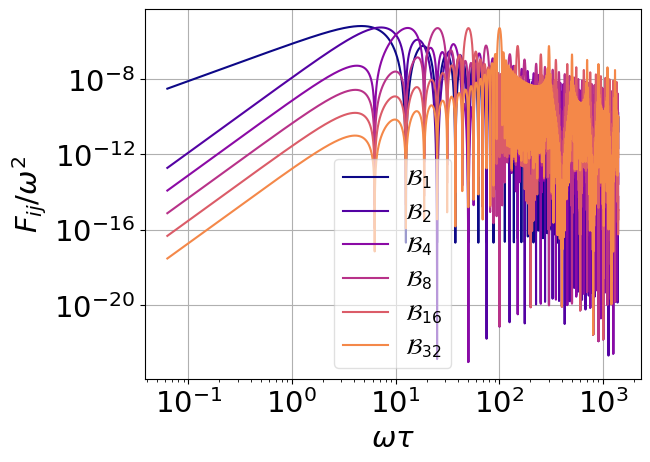

In [ ]:
colors = plt.cm.plasma(np.linspace(0, 1, 8))  # Generate colors for 6 iterations

for i, n in enumerate([1, 2, 4, 8, 16, 32]):
    P1 = generate_pulse_sequence(0, 0, 5e-3, n, "Ideal")
    FF1 = P1[1]
    omegatau_list1 = P1[2]

    plt.plot(
        omegatau_list1[:25000], FF1[:25000],
        color=colors[i],  # Assign a unique color from colormap
        label=rf"$\mathcal{{B}}_{{{n}}}$"

    )

plt.ylabel(r'$F_{ij}/\omega^{2}$')
plt.xlabel(r'$\omega\tau$')
plt.xscale('log')
plt.yscale('log')

plt.legend(
    fontsize=16,         # 🔽 Smaller font size for legend
    framealpha=0.6,      # Optional: semi-transparent background
    facecolor='white'    # Optional: legend box color
)


# Save as PDF with editable fonts

plt.grid()
# plt.savefig("Fig_3d.pdf", format='pdf', bbox_inches='tight')

# Show plot
plt.show()

###Plot for FF(N=1) vs detuning f

(6.562860089612677e-06+0j)
(6.563229644105058e-06+0j)
(6.562035959251074e-06+0j)
(6.556582449193376e-06+0j)
(6.539929793156995e-06+0j)
(6.497148047834862e-06+0j)
(6.410104443544882e-06+0j)
(6.302948198199593e-06+0j)


(6.277405057153612e-06+0j)


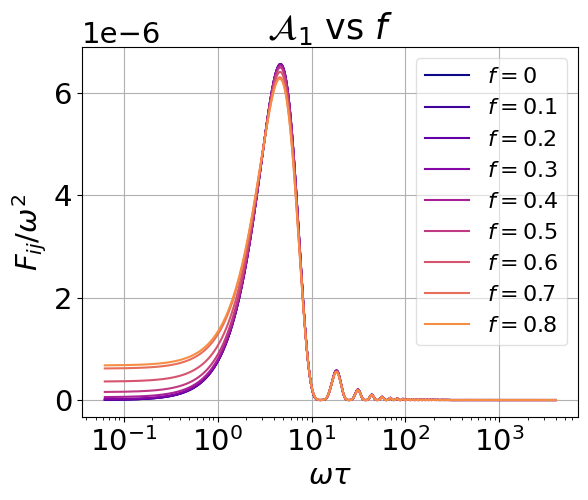

In [ ]:
colors = plt.cm.plasma(np.linspace(0, 1, 12))  # Generate colors for 9 iterations

for i , f in enumerate([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]):
    P1 = generate_pulse_sequence(f, 0, 5e-3, 1, "Grape")
    FF1 = P1[1]
    omegatau_list1 = P1[2]

    plt.plot(
        omegatau_list1[:25000], FF1[:25000],
        color=colors[i],  # Assign a unique color from colormap
        label=rf"$f={f}$"

    )

    print(max(FF1))


plt.title(r"$\mathcal{A}_{1}$ vs $f$")
plt.ylabel(r'$F_{ij}/\omega^{2}$')
plt.xlabel(r'$\omega\tau$')
plt.xscale('log')
#plt.yscale('log')


plt.legend(
    fontsize=16,         # 🔽 Smaller font size for legend
    framealpha=0.6,      # Optional: semi-transparent background
    facecolor='white'    # Optional: legend box color
)


# Save as PDF with editable fonts

plt.grid()
# plt.savefig("Fig_3f.pdf", format='pdf', bbox_inches='tight')

# Show plot
plt.show()

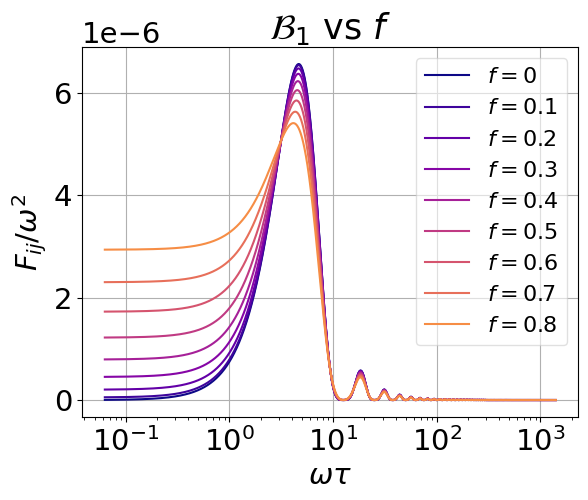

In [ ]:
colors = plt.cm.plasma(np.linspace(0, 1, 12))  # Generate colors for 9 iterations

for i , f in enumerate([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]):
    P1 = generate_pulse_sequence(f, 0, 5e-3, 1, "Ideal")
    FF1 = P1[1]
    omegatau_list1 = P1[2]

    plt.plot(
        omegatau_list1[:25000], FF1[:25000],
        color=colors[i],  # Assign a unique color from colormap
        label=rf"$f={f}$"

    )


plt.title(r"$\mathcal{B}_{1}$ vs $f$")
plt.ylabel(r'$F_{ij}/\omega^{2}$')
plt.xlabel(r'$\omega\tau$')
plt.xscale('log')
#plt.yscale('log')


plt.legend(
    fontsize=16,         # 🔽 Smaller font size for legend
    framealpha=0.6,      # Optional: semi-transparent background
    facecolor='white'    # Optional: legend box color
)


# Save as PDF with editable fonts

plt.grid()
plt.savefig("Fig_3g.pdf", format='pdf', bbox_inches='tight')

# Show plot
plt.show()